# Assignment 1 Brief 

## Deadline: Tuesday, October 29, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 1 to 5

### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_1_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to express an objective function and its gradients in matrix form.

* Being able to use numpy and pandas to preprocess a dataset.

* Being able to use numpy to build a machine learning pipeline for supervised learning. 


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# Regularisation for Linear Regression

Regularisation is a technique commonly used in Machine Learning to prevent overfitting. It consists on adding terms to the objective function such that the optimisation procedure avoids solutions that just learn the training data. Popular techniques for regularisation in Supervised Learning include Lasso Regression, Ridge Regression and the Elastic Net. 

In this Assignment, you will be looking at Ridge Regression and devising equations to optimise the objective function in Ridge Regression using two methods: a closed-form derivation and the update rules for stochastic gradient descent. You will then use those update rules for making predictions on a Air Quaility dataset.

## Ridge Regression

Let us start with a data set for training $\mathcal{D} = \{\mathbf{y}, \mathbf{X}\}$, where the vector $\mathbf{y}=[y_1, \cdots, y_n]^{\top}$ and $\mathbf{X}$ is the design matrix from Lab 3, this is, 

\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{n,1} & \cdots & x_{n, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_n^{\top}
                \end{bmatrix}.
\end{align*}

Our predictive model is going to be a linear model

$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i,$$

where $\mathbf{w} = [w_0\; w_1\; \cdots \; w_D]^{\top}$.

The **objetive function** we are going to use has the following form

$$ J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \frac{\alpha}{2}\sum_{j=0}^D w_j^2,$$

where $\alpha>0$ is known as the *regularisation* parameter.

The first term on the right-hand side (rhs) of the expression for $J(\mathbf{w}, \alpha)$ is very similar to the least-squares objective function we have seen before, for example in Lab 3. The only difference is on the term $\frac{1}{n}$ that we use to normalise the objective with respect to the number of observations in the dataset. 

The first term on the rhs is what we call the "fitting" term whereas the second term in the expression is the regularisation term. Given $\alpha$, the two terms in the expression have different purposes. The first term is looking for a value of $\mathbf{w}$ that leads the squared-errors to zero. While doing this, $\mathbf{w}$ can take any value and lead to a solution that it is only good for the training data but perhaps not for the test data. The second term is regularising the behavior of the first term by driving the $\mathbf{w}$ towards zero. By doing this, it restricts the possible set of values that $\mathbf{w}$ might take according to the first term. The value that we use for $\alpha$ will allow a compromise between a value of $\mathbf{w}$ that exactly fits the data (first term) or a value of $\mathbf{w}$ that does not grow too much (second term).

This type of regularisation has different names: ridge regression, Tikhonov regularisation or $\ell_2$ norm regularisation. 

### Question 1: $J(\mathbf{w}, \alpha)$ in matrix form (2 marks)

Write the expression for $J(\mathbf{w}, \alpha)$ in matrix form. Include ALL the steps necessary to reach the expression.

#### Question 1 Answer
The original function is:
$$
J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \frac{\alpha}{2}\sum_{j=0}^D w_j^2
$$
Since $\mathbf{X}\in \mathbb{R}^{n \times (D+1)}$, $\mathbf{w}\in \mathbb{R}^{(D+1)\times 1}$ and $\mathbf{y}\in \mathbb{R}^{n \times 1}$, when converting from scalar to matrix, the loss function is:
\begin{align*}
J(\mathbf{w}, \alpha) & = \frac{1}{n}(\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}-\mathbf{X}\mathbf{w})+\frac{\alpha}{2}\mathbf{w}^T\mathbf{w}\\
                      & = \frac{1}{n}(\mathbf{y}^T-\mathbf{w}^T\mathbf{X}^T)(\mathbf{y}-\mathbf{X}\mathbf{w})+\frac{\alpha}{2}\mathbf{w}^T\mathbf{w}\\
                      & = \frac{1}{n}(\mathbf{y}^T\mathbf{y}-\mathbf{y}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{y}+\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w})+\frac{\alpha}{2}\mathbf{w}^T\mathbf{w}
\end{align*}

## Optimising the objective function with respect to $\mathbf{w}$

There are two ways we can optimise the objective function with respect to $\mathbf{w}$. The first one leads to a closed form expression for $\mathbf{w}$ and the second one using an iterative optimisation procedure that updates the value of $\mathbf{w}$ at each iteration by using the gradient of the objective function with respect to $\mathbf{w}$,
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}},
$$
where $\eta$ is the *learning rate* parameter and $\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}}$ is the gradient of the objective function.

### Question 2: Derivative of $J(\mathbf{w}, \alpha)$ wrt $\mathbf{w}$ (2 marks)

Find the closed-form expression for $\mathbf{w}$ by taking the derivative of $J(\mathbf{w}, \alpha)$ with respect to 
$\mathbf{w}$, equating to zero and solving for $\mathbf{w}$. Write the expression in matrix form. 

Also, write down the specific update rule for $\mathbf{w}_{\text{new}}$ by using the equation above.

#### Question 2 Answer
**1. The closed-form expression for $\mathbf{w}$**

In order to calculate the gradient of the objective function, it is necessary to solve the partial derivative of the objective function to $\mathbf{w}$, that is, calculate $\frac{\partial J(\mathbf{w},\alpha)}{\partial \mathbf{w}}$.
\begin{align*}
\frac{\partial J(\mathbf{w},\alpha)}{\partial \mathbf{w}} &= \frac{\partial (\frac{1}{n}(\mathbf{y}^T\mathbf{y}-\mathbf{y}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{y}+\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w})+\frac{\alpha}{2}\mathbf{w}^T\mathbf{w})}{\partial \mathbf{w}}\\
&=\frac{1}{n}(0-(\mathbf{y}^T\mathbf{X})^T-\mathbf{X}^T\mathbf{y}+2\mathbf{X}^T\mathbf{X}\mathbf{w})+\frac{\alpha}{2}2\mathbf{w}\\
&=\frac{1}{n}(-\mathbf{X}^T\mathbf{y}-\mathbf{X}^T\mathbf{y}+2\mathbf{X}^T\mathbf{X}\mathbf{w})+\alpha \mathbf{w}\\
&=\frac{2}{n}(\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{X}^T\mathbf{y})+\alpha \mathbf{w}
\end{align*}
Let the expression of the closed form of the gradient equal $0$ to solve $\mathbf{w}$, in other words, let $\frac{\partial J(\mathbf{w},\alpha)}{\partial \mathbf{w}} = 0$.
\begin{align*}
\frac{\partial J(\mathbf{w},\alpha)}{\partial \mathbf{w}} &= 0\\
\frac{2}{n}(\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{X}^T\mathbf{y})+\alpha \mathbf{w} &= 0\\
\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{X}^T\mathbf{y} + \frac{\alpha}{2}n\mathbf{w}&= 0\\
\mathbf{X}^T\mathbf{X}\mathbf{w} + \frac{\alpha}{2}n\mathbf{w} &= \mathbf{X}^T\mathbf{y}\\
(\mathbf{X}^T\mathbf{X} + \frac{\alpha}{2}nI_{D+1})\mathbf{w} &= \mathbf{X}^T\mathbf{y}\\
\mathbf{w} &= (\mathbf{X}^T\mathbf{X} + \frac{\alpha}{2}nI_{D+1})^{-1}\mathbf{X}^T\mathbf{y}
\end{align*}
where $I_{D+1}$ is identity matrix, $I_{D+1}\in \mathbb{R}^{(D+1)\times(D+1)}$.

**2. The specific update rule for  $\mathbf{w}_{\text{new}}$**

According to formulas $\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}}$ and $\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}} = \frac{2}{n}(\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{X}^T\mathbf{y})+\alpha \mathbf{w}$, the formula for $\mathbf{w}_\text{new}$ is,
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta(\frac{2}{n}(\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{X}^T\mathbf{y})+\alpha \mathbf{w})
$$

# Using ridge regression to predict air quality

Our dataset comes from a popular machine learning repository that hosts open source datasets for educational and research purposes, the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We are going to use ridge regression for predicting air quality. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Air+Quality).

In [1]:
import pods
pods.util.download_url('https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip')
import zipfile
zip = zipfile.ZipFile('./AirQualityUCI.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

[===========================   ]   1.328/1.472MB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [2]:
# The .csv version of the file has some typing issues, so we use the excel version
import pandas as pd 
air_quality = pd.read_excel('./AirQualityUCI.xlsx', usecols=range(2,15))

We can see some of the rows in the dataset 

In [3]:
air_quality.sample(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
6007,1.0,800.00,-200,2.822356,640.75,126.0,1112.50,76.0,956.50,590.75,11.200000,42.024999,0.558236
6593,1.5,882.50,-200,6.199042,821.00,304.0,885.75,111.0,966.50,843.50,16.200001,26.200000,0.478862
3035,0.4,823.50,-200,3.124777,659.75,36.0,1032.50,46.0,1341.50,618.00,21.425001,45.575000,1.149323
8367,5.4,1500.75,-200,23.978977,1403.00,756.7,418.25,242.9,1789.00,1589.25,4.625000,80.299999,0.688921
7078,-200.0,900.25,-200,5.623016,794.00,-200.0,905.75,-200.0,929.75,710.00,12.250000,29.725000,0.422611


The target variable corresponds to the CO(GT) variable of the first column. The following columns correspond to the variables in the feature vectors, *e.g.*, PT08.S1(CO) is $x_1$ up until AH which is $x_D$. The original dataset also has a date and a time columns that we are not going to use in this assignment.

Before designing our predictive model, we need to think about three stages: the preprocessing stage, the training stage and the validation stage. The three stages are interconnected and *it is important to remember that the testing data that we use for validation has to be set aside before preprocessing*. Any preprocessing that you do has to be done only on the training data and several key statistics need to be saved for the test stage.

Separating the dataset into training and test before any preprocessing has happened help us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing.

We are going to use *hold-out validation* for testing our predictive model so we need to separate the dataset into a training set and a test set.

### Question 3: Splitting the dataset (1 mark)

Split the dataset into a training set and a test set. The training set should have 70% of the total observations and the test set, the 30%. For making the random selection make sure that you use a random seed that corresponds to the last five digits of your student UCard. Make sure that you comment your code.

#### Question 3 Answer

In [4]:
import numpy as np

def Separate_train_test(data: pd.core.frame.DataFrame,
                     test_size=0.3, random_state=0) -> tuple:
    np.random.seed(random_state)  # set the random seed
    total_number = len(data.index)  # the number of data
    train_number = round(total_number * (1-test_size))  # the number of test data
    disorder = np.random.permutation(total_number)  # disorder data index
    train_list = disorder[0:train_number]
    test_list = disorder[train_number:]
    return data.loc[train_list].copy(), data.loc[test_list].copy()

studentId = 20410
test_rate = 0.3

# Separation training and test set
train_dataset, test_dataset = Separate_train_test(
    air_quality, test_size=test_rate, random_state=studentId)

## Preprocessing the data

The dataset has missing values tagged with a -200 value. Before doing any work with the training data, we want to make sure that we deal properly with the missing values. 

### Question 4: Missing values (3 marks)

Make some exploratory analysis on the number of missing values per column in the training data. 

* Remove the rows for which the target feature has missing values. We are doing supervised learning so we need all our data observations to have known target values.

* Remove features with more than 20% of missing values. For all the other features with missing values, use the mean value of the non-missing values for imputation.

#### Question 4 Answer

In [5]:
class PretreatMissing:
    def __init__(self, data, key_column, missing_value=-200):
        self.data = data.copy()  # Pandas Data
        self.key_column = key_column  # Target feature
        self.missing_value = missing_value  # The value of missing items, e.g, -200
        self.drop_features = None  # Features with missing items greater than 20%
        self.fill_mean = None  # The mean of features for replacing missing values

    # Remove missing items from target features
    def DropKeyData(self):
        missing_row = self.data[self.data[self.key_column]
                                == self.missing_value]
        self.data = self.data.drop(missing_row.index)

    # Find features with missing items greater than 20%
    def Over20Missing(self):
        if self.drop_features == None:
            self.drop_features = self.data.columns[(
                self.data == self.missing_value).sum() > len(self.data)*0.2]
        self.data = self.data.drop(self.drop_features, axis=1)
        print("Drop features:", *self.drop_features.values)

    # Replace missing value
    def ReplaceMean(self):
        # See if there is a default mean for replacement
        if self.fill_mean == None:
            self.fill_mean = dict()
            # Calculate the mean of non-missing values
            for column in self.data.columns:
                if column != self.key_column:
                    mean = self.data[column][(
                        self.data != -200)[column]].mean()
                    self.fill_mean[column] = mean
        # Replace missing value with mean one column by one column
        for column in self.data.columns:
            if column != self.key_column:
                select_missing = self.data[column] == self.missing_value
                self.data[column][select_missing] = self.fill_mean[column]

    def Update(self):
        self.DropKeyData()
        self.Over20Missing()
        self.ReplaceMean()
    # Check for missing values

    def CheckMissing(self):
        return -200 in self.data.values

train_process_missing = PretreatMissing(
    data=train_dataset, key_column='CO(GT)', missing_value=-200)
train_process_missing.Update()
if train_process_missing.CheckMissing():
    print("Missing values")
else:
    train_dataset = train_process_missing.data

Drop features: NMHC(GT)


### Question 5: Normalising the training data (2 marks)

Now that you have removed the missing data, we need to normalise the input vectors. 

* Explain in a sentence why do you need to normalise the input features for this dataset.

* Normalise the training data by substracting the mean value for each feature and dividing the result by the standard deviation of each feature. Keep the mean values and standard deviations, you will need them at test time.

#### Question 5 Answer

LeCun points out that after normalization, the optimal parameters $\mathbf{w}$ can be obtained more easily and the minimum value of $J(\mathbf{w})$ can be calculated to achieve the effect of accelerating convergence.
> LeCun, Y.A., Bottou, L., Orr, G.B. and Müller, K.R., 2012. Efficient backprop. In Neural networks: Tricks of the trade (pp. 9-48). Springer, Berlin, Heidelberg.

In [6]:
class PretreatNormal:
    def __init__(self, data, mean=None, std=None):
        self.data = data.copy()  # Pandas Data
        self.mean = mean  # The mean of features
        self.std = std  # The standard deviation of features
        self.Update()

    def Normal(self):
        # Remove the target feature
        feature_list = self.data.columns.to_list()[1:]
        if self.mean is None:
            self.mean = self.data[feature_list].mean()  # Calculate Mean
        if self.std is None:
            # Calculate standard deviation
            self.std = self.data[feature_list].std()
        # Normalized processing
        self.data[feature_list] = (
            self.data[feature_list] - self.mean)/self.std

    def Update(self):
        self.Normal()

train_process_normal = PretreatNormal(train_dataset)
train_dataset = train_process_normal.data

## Training and validation stages

We have now curated our training data by removing data observations and features with a large amount of missing values. We have also normalised the feature vectors. We are now in a good position to work on developing the prediction model and validating it. We will use both the closed form expression for $\mathbf{w}$ and gradient descent for iterative optimisation. 

We first organise the dataframe into the vector of targets $\mathbf{y}$ and the design matrix $\mathbf{X}$.

In [7]:
def Separate_data_label(data: pd.core.frame.DataFrame):
    data_copy = data.copy()  # Copy data

    y = data_copy[['CO(GT)']].to_numpy()

    data_copy['CO(GT)'] = 1  # set x_0 to 1
    X = data_copy.to_numpy()
    return X, y

X, y = Separate_data_label(train_dataset)

### Question 6: training with closed form expression for $\mathbf{w}$ (3 marks)

To find the optimal value of $\mathbf{w}$ using the closed form expression that you derived before, we need to know the value of the regularisation parameter $\alpha$ in advance. We will determine the value by using part of the training data for finding the parameters $\mathbf{w}$ and another part of the training data to choose the best $\alpha$ from a set of predefined values.

* Use `np.logspace(start, stop, num)` to create a set of values for $\alpha$ in log scale. Use the following parameters `start=-3`, `stop=2` and `num=20`. 

* Randomly split the training data into what is properly called the training set and the validation set. As before, make sure that you use a random seed that corresponds to the last five digits of your student UCard. Use 70% of the data for the training set and 30% of the data for the validation set.

* For each value that you have for $\alpha$ from the previous step, use the training set to compute $\mathbf{w}$ and then measure the mean-squared error (MSE) over the validation data. After this, you will have `num=20` MSE values. Choose the value of $\alpha$ that leads to the lower MSE and save it. You will use it at the test stage.

* What was the best value of $\alpha$? Is there any explanation for that?

#### Question 6 Answer

In [8]:
def Separate_train_valid(data: pd.core.frame.DataFrame,
                         valid_size=0.3, random_state=0) -> tuple:
    np.random.seed(random_state)  # set the random seed
    total_number = len(data.index)  # the number of data
    train_number = round(total_number * (1-valid_size))  # the number of test data
    disorder = np.random.permutation(data.index.to_list())
    train_list = disorder[0:train_number]
    valid_list = disorder[train_number:]
    return data.loc[train_list], data.loc[valid_list]

# Calculate the value of w according to the closed formula
def Getw(X, y, alpha):
    n_sample, D1_feature = X.shape
    w = np.linalg.inv(X.T.dot(X)+alpha/2*n_sample *
                      np.identity(D1_feature)).dot(X.T).dot(y)
    return w

# Calculate the Mean Square Error
def MSE(X, y, w):
    n_sample, D1_feature = X.shape
    loss = y.T.dot(y)-y.T.dot(X).dot(w) - \
        w.T.dot(X.T).dot(y) + w.T.dot(X.T).dot(X).dot(w)
    return np.squeeze(loss/n_sample)

# Calculate the object function error
def ObjLoss(X, y, w, alpha):
    n_sample, D1_feature = X.shape
    loss = y.T.dot(y)-y.T.dot(X).dot(w) - w.T.dot(X.T).dot(y) + \
        w.T.dot(X.T).dot(X).dot(w) + alpha/2*w.T.dot(w)
    return np.squeeze(loss/n_sample)


# Set the scale of alpha
parameter_alpha_scale = np.logspace(start=-3, stop=2, num=20)

train_subset, valid_subset = Separate_train_valid(
    train_dataset, 0.3, studentId)

# Extract the design matrix X and vector y
X_train, y_train = Separate_data_label(train_subset)
X_valid, y_valid = Separate_data_label(valid_subset)

MSE_error_list = list()
for alpha in parameter_alpha_scale:
    w = Getw(X_train, y_train, alpha)  # Get w
    MSE_error = MSE(X_valid, y_valid, w)  # Calculate the Mean Square Error
    MSE_error_list.append(MSE_error)  # Store into a list
lowest_MSE_error = min(MSE_error_list)
lowest_MSE_index = MSE_error_list.index(lowest_MSE_error)
alpha_best = parameter_alpha_scale[lowest_MSE_index]

print("The best alpha: {}".format(alpha_best))
print("Lowest MSE error: {:.7f}".format(lowest_MSE_error))

The best alpha: 0.001
Lowest MSE error: 0.2450841


**Answer: The best value of $\alpha$:**

The best choice for hyperparameter $\alpha$ can be selected by cross-validation. Specifically, at each value of $\alpha$, the accuracies are calculated by cross-validation, and the average is taken. The $\alpha$ corresponding to the highest average accuracy has stronger generalization ability.

The larger $\alpha$, the stronger the generalization ability of the function. The L2 regularization is to prevent the function from overfitting, which is a penalty imposed on the objective function (loss function). The essence of L2 regularization is to fit the data using a smaller $\mathbf{w}$. When $\alpha$ is small, the function is easy to overfit, fits well with the training data, and fits poorly with the test data. Conversely, when $\alpha$ is large, it can effectively prevent overfitting. Therefore, a reasonable choice $\alpha$ can generate a more generalized function.

### Question 7: validation with the closed form expression for $\mathbf{w}$ (2 marks)

We are going to deal now with the test data to perform the validation of the model. Remember that the test data might also contain missing values in the target variable and in the input features.

* Remove the rows of the test data for which the labels have missing values. 
* If you remove any feature at the training stage, you also need to remove the same features from the test stage.
* Replace the missing values on each feature variables with the mean value you computed in the training data.
* Normalise the test data using the means and standard deviations computed from the training data
* Compute again $\mathbf{w}$ for the value of $\alpha$ that best performed on the validation set using ALL the training data (not all the training set).
* Report the MSE on the preprocessed test data and an histogram with the absolute error.
* Does the regularisation have any effect on the model? Explain your answer.

#### Question 7 Answer

Drop features: NMHC(GT)


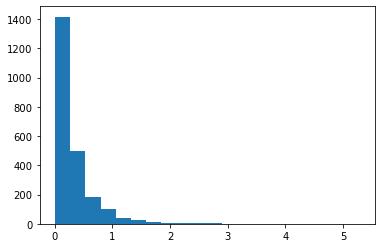

In [9]:
import matplotlib.pyplot as plt

# Deal with missing value
test_process_missing = PretreatMissing(
    data=test_dataset, key_column='CO(GT)', missing_value=-200)
test_process_missing.drop_features = train_process_missing.drop_features
test_process_missing.fill_mean = train_process_missing.fill_mean
test_process_missing.Update()
if test_process_missing.CheckMissing():  # Check any missing value
    print("Missing values")
else:
    test_dataset = test_process_missing.data

# Normalize
test_process_normal = PretreatNormal(data=test_dataset,
                                     mean=train_process_normal.mean,
                                     std=train_process_normal.std)
test_dataset = test_process_normal.data

# Extract the design matrix X and vector y
X_valid, y_valid = Separate_data_label(valid_subset)
X_test, y_test = Separate_data_label(test_dataset)

# Calculate W according to the best alpha
w = Getw(X_valid, y_valid, alpha_best)

# Save parameters for comparing in Question 8
w_form = w
alpha_form = alpha_best
form_compare = (w_form, alpha_form)

# Plotting
%matplotlib inline
fig = plt.hist(abs(y_test - np.dot(X_test, w)), bins=20)

**Answer: The regularisation:**

The regularisation have effect on the model.

The objective function consists of two parts: the MSE and L2 regulars.
Our goal is to minimize the objective function, so this is also a trade-off between the MSE and L2 regulars. While $\alpha$ is a balanced indicator, when $\alpha$ is large, $\mathbf{w}$ is more sparse, and the generalization ability of prediction function is stronger; when $\alpha$ is small, the prediction function is more likely to overfit.

## Question 8: training with gradient descent and validation (5 marks)


Use gradient descent to iteratively compute the value of $\mathbf{w}_{\text{new}}$. Instead of using all the training set to compute the gradient, use a subset of $B$ datapoints in the training set. This is sometimes called minibatch gradient descent where $B$ is the size of the minibacth. When using gradient descent with minibatches, you need to find the best values for three parameters: $\eta$, the learning rate, $B$, the number of datapoints in the minibatch and $\alpha$, the regularisation parameter.

* As you did on Question 6, create a grid of values for the parameters $\alpha$ and $\eta$ using `np.logspace` and a grid of values for $B$ using `np.linspace`. Because you need to find 
 three parameters, start with `num=5` and see if you can increase it.

* Use the same training set and validation set that you used in Question 6.

* For each value that you have of $\alpha$, $\eta$ and $B$ from the previous step, use the training set to compute $\mathbf{w}$ using minibatch gradient descent and then measure the MSE over the validation data. For the minibatch gradient descent choose to stop the iterative procedure after $500$ iterations.

* Choose the values of $\alpha$, $\eta$ and $B$ that lead to the lower MSE and save them. You will use them at the test stage.

*3 marks of out of the 5 marks*


* Use the test set from Question 7 and provide the MSE obtained by having used minibatch training with the best values for $\alpha$, $\eta$ and $B$ over the WHOLE training data (not only the training set).

* Compare the performance of the closed form solution and the minibatch solution. Are the performances similar? Are the parameters $\mathbf{w}$ and $\alpha$ similar in both approaches? Please comment on both questions.

*2 marks of out of the 5 marks*

#### Question 8 Answer

In [10]:
# Get a single batch
def GetMiniBatch(data, batch_size):
    sellect_batch_index = np.random.permutation(data.index)[:batch_size]
    batch_sellection = data.index == sellect_batch_index[0]
    for x in sellect_batch_index[1:]:
        batch_sellection |= data.index == x
    batch_data = data[batch_sellection]
    X, y = Separate_data_label(batch_data)
    return X, y

# Calculating the gradient
def Grad(X, y, w, alpha):
    n_sample, D1_feature = X.shape
    dw = 2/n_sample*(X.T.dot(X).dot(w)-X.T.dot(y))+alpha*w
    return dw

# Use the random gradient descent to update w
def SGD(data, alpha, lr, batch_size, iteration, X_MSE=X_valid, y_MSE=y_valid, draw=True):
    w = np.random.rand(12, 1)*0.01
    n_iter = 0
    while n_iter < iteration:
        X_batch, y_batch = GetMiniBatch(data, batch_size)
        w -= lr*Grad(X_batch, y_batch, w, alpha)
        n_iter += 1
    MSE_error = MSE(X_MSE, y_MSE, w)
    if draw:
        print("MSE error:", MSE_error)
    return w, MSE_error

# Set scale of learning rate, alpha and batch size
parameter_lr_scale = np.logspace(start=-3, stop=-1, num=5)
parameter_alpha_scale = np.logspace(start=-3, stop=-1, num=20)
parameter_batch_scale = np.linspace(start=50, stop=500, num=5)

# Extract the design matrix X and vector y
X_train, y_train = Separate_data_label(train_subset)
X_valid, y_valid = Separate_data_label(valid_subset)

# List for recording the data
data_record = list()

iteration = 500
# 3 loops to traverse 3 parameters：lr, alpha, batch size
for lr in parameter_lr_scale:
    for alpha in parameter_alpha_scale:
        for batch_size in parameter_batch_scale:
            if type(batch_size) != int:
                batch_size = int(batch_size)
            _, MSE_error = SGD(train_subset, alpha, lr, batch_size, iteration)
            data_record.append([float(MSE_error), alpha, lr, batch_size])

MSE error: 0.934923672823871
MSE error: 0.9417397495765976
MSE error: 0.9404957686710096
MSE error: 0.940696023701208
MSE error: 0.9354697251777838
MSE error: 0.9468682264629594
MSE error: 0.9306639321024156
MSE error: 0.9415181030230713
MSE error: 0.9406016669782998
MSE error: 0.9411939341603578
MSE error: 0.9306697413178724
MSE error: 0.9350625639888392
MSE error: 0.942329824066661
MSE error: 0.9363436446255607
MSE error: 0.9395451878983551
MSE error: 0.9417178666497892
MSE error: 0.9298290591835692
MSE error: 0.9406358230004214
MSE error: 0.9400753010429217
MSE error: 0.9393319947341079
MSE error: 0.9429940882010555
MSE error: 0.9402677001252585
MSE error: 0.9435840428069088
MSE error: 0.9390131546052762
MSE error: 0.9404619851522152
MSE error: 0.9413141889052828
MSE error: 0.946268425151452
MSE error: 0.940947353648272
MSE error: 0.9421168872911557
MSE error: 0.9422071418258952
MSE error: 0.9330308280397818
MSE error: 0.9431127451713381
MSE error: 0.9421134740120353
MSE error: 0.94

MSE error: 0.2571239229408891
MSE error: 0.25680396332403993
MSE error: 0.2559426815413488
MSE error: 0.25638761705825047
MSE error: 0.2586875810406814
MSE error: 0.2567446816161725
MSE error: 0.25901042025245186
MSE error: 0.2572780184123755
MSE error: 0.25620178399431937
MSE error: 0.25950964791514824
MSE error: 0.25922563817272515
MSE error: 0.260190709855581
MSE error: 0.25806400419240066
MSE error: 0.2590811641122282
MSE error: 0.25925508625022725
MSE error: 0.25999948388053257
MSE error: 0.2607597810174304
MSE error: 0.26023704079758064
MSE error: 0.2606435957768452
MSE error: 0.261023030619027
MSE error: 0.26450079681873556
MSE error: 0.26379368991012286
MSE error: 0.2638430595059367
MSE error: 0.2640732364520606
MSE error: 0.27078629292086304
MSE error: 0.2711210684350081
MSE error: 0.2687646846463515
MSE error: 0.2687108203315873
MSE error: 0.2706640108985534
MSE error: 0.24884153159212322
MSE error: 0.24503065156651482
MSE error: 0.2496323587121531
MSE error: 0.24685670689747

In [11]:
# Find the best parameters with the lowest MSE error
data_record = pd.DataFrame(data=data_record, columns=[
                           'MSE_error', 'alpha', 'lr', 'batch_size'])
record_best = data_record[data_record.MSE_error == data_record.MSE_error.min()]
print('Lowest MSE error:', *record_best.MSE_error.values)
print('The best alpha:', *record_best.alpha.values)
print('The best learning rate:', *record_best.lr.values)
print('The best batch size:', *record_best.batch_size.values)

# Test on test dataset
# Set the best parameters
alpha = float(record_best.alpha.values)
lr = float(record_best.lr.values)
batch_size = int(record_best.batch_size.values)

# Updata w on the whole training dataset
w, _ = SGD(train_dataset, alpha, lr, batch_size, iteration, draw=False)

# Evaluate the model on test dataset
X_test, y_test = Separate_data_label(test_dataset)
test_MSE_error = MSE(X_test, y_test, w)
print("----------Test Dataset------------")
print("The MSE error on test dataset:", test_MSE_error)

Lowest MSE error: 0.24305268475995
The best alpha: 0.001623776739188721
The best learning rate: 0.1
The best batch size: 162
----------Test Dataset------------
The MSE error on test dataset: 0.23832479493037595


**Answer: Two methods**

The performance of closed-form and small-batch solution varies widely. The closed-form takes less time and consumes more memory, while the batch gradient descent takes longer because it requires multiple iterations.

The parameters $\mathbf{w}$ and $\alpha$ calculated in the two methods are similar. This is mainly because the objective function is the same whether it is a closed-form solution or a small batch solution, and the ultimate goal is to minimize the objective function. However, in more complex data sets, the parameters obtained by the two methods may be different. Unlike the one-step solution of the closed-form solution, the small-batch stochastic gradient descent method may fall into the local minimum. The objective function cannot reach the global minimum, and the resulting parameters will vary widely.

In [14]:
# Euclidean Distance
def distance(v1,v2):
    d = v1-v2
    d = (d.T.dot(d))**0.5
    return np.squeeze(d)

# Save parameters for comparing in Question 8
w_batch, alpha_batch = w, alpha
batch_compare = (w_batch, alpha_batch)

# Compare the results in closed-form and small-batch solution
diff_compare = distance(batch_compare[0],form_compare[0])
print("--------------- w comparison ----------------")
print("The Euclidean Distance between w:",diff_compare)
print("\n------------- alpha comparison --------------")
if batch_compare[1] == form_compare[1]:
    print("The two alphas are the same")
else:
    print("The Euclidean Distance between alpha:", abs(batch_compare[1]-form_compare[1]))

--------------- w comparison ----------------
The Euclidean Distance between w: 0.2010818186174413

------------- alpha comparison --------------
The Euclidean Distance between alpha: 0.000623776739188721
